<a href="https://colab.research.google.com/github/Ansuman09/Amazon-Stock-Analysis/blob/main/KeyWord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading the data

The Data was obtained from world bank project arcticle writtrn on Health Care Investments.

In [ ]:
#uncomment and run this cell to install keybert

# !pip install keybert

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://documents1.worldbank.org/curated/en/230911654610397012/text/Ghana-Primary-Health-Care-Investment-Program.txt"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

text=soup.get_text()

In [ ]:
#convert the lines of text into a list
text=[lines for lines in text.splitlines() if len(text)>2]


#here is a sample of the data 
for line in text[10:30]:
  print(line)


                                 IN THE AMOUNT OF US$150 MILLION

                                                    AND

                     PROPOSED GRANTS FROM THE GLOBAL FINANCING FACILITY

                                 IN THE AMOUNTS OF US$15 MILLION

                                         AND US$16 MILLION

                                                   TO THE

                                         REPUBLIC OF GHANA

                                                   FOR A

                           PRIMARY HEALTH CARE INVESTMENT PROGRAM

                                             MAY 19, 2022


#Model

In [ ]:
#We make use of a pre trained model from BERT

from keybert import KeyBERT

model=KeyBERT()


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
doc1=''.join(text)

history=model.extract_keywords(
    doc1,                                           #input data as a string
    top_n=30,                                       #number of key words to extract
    keyphrase_ngram_range=(1,1),                    #length of the keyword i.e. setting it to be (1,2) would get two worded string
    stop_words='english'
)


## Detected Keywords

In [ ]:
history

[('usd', 0.4854),
 ('ghanaimplementing', 0.4506),
 ('ghanadistrict', 0.4364),
 ('currency', 0.4324),
 ('ghanaian', 0.4141),
 ('worldbank', 0.4096),
 ('ghana', 0.4074),
 ('gdp', 0.3759),
 ('2026bank', 0.3737),
 ('monetary', 0.3627),
 ('financinghealth', 0.3466),
 ('ghanaians', 0.3437),
 ('dollar', 0.3404),
 ('nationalinsurance', 0.3381),
 ('fundsagencies', 0.3358),
 ('dollarusaid', 0.3354),
 ('billion', 0.334),
 ('saharan', 0.332),
 ('financial', 0.3275),
 ('nationalhealth', 0.3269),
 ('agenciesmdtf', 0.3219),
 ('bank', 0.3196),
 ('amountghana', 0.3196),
 ('financials', 0.3195),
 ('treasury', 0.3156),
 ('bankprimary', 0.3149),
 ('ghc', 0.314),
 ('income', 0.3099),
 ('reportsmdas', 0.3087),
 ('issued', 0.3067)]

In [ ]:
kword_detected=[words[0] for words in history] 

print('''The key word detector was able to detect units like: [dollar,usd]
Govt. Agencies like : World Bank, Natinal Health ,National Insurance''')


The key word detector was able to detect units like: [dollar,usd]
Govt. Agencies like : World Bank, Natinal Health ,National Insurance


# PLotting the Data

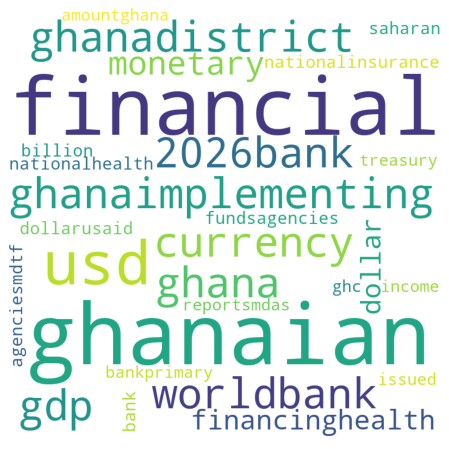

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

words=' '.join(kword_detected)

stopwords=set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wordcloud);
 